## Birthday problem simulated

Let's say we can't figure out how to formally calculate the probability that 2 people out of N have the same birthday (ignoring leap years). Not to worry: we can simulate it!

First let's write a function to simulate the number of people who have the same birthday out of N:

In [1]:
import random
from collections import defaultdict

def num_people_same_birthday(n):
    bdays = defaultdict(int)
    for i in range(n):
        bdays[random.randrange(0, 365)] += 1
    return len([k for (k, v) in bdays.items() if v > 1])    

num_people_same_birthday(60)

4

That doesn't give as an emperical probability though, we need to run some trials to do that.

In [2]:
def prob_n_people_have_same_birthday(n, *, num_trials):
    num_positive_trials = len([1 for i in range(num_trials) if num_people_same_birthday(n) > 0])
    return float(num_positive_trials) / num_trials

prob_n_people_have_same_birthday(60, num_trials=1000)

0.992

Note that because the liklihood is high, we need 1000 trials to suss out that it's not 100%; here's what we get if we use 10 a couple times:


In [3]:
prob_n_people_have_same_birthday(60, num_trials=10)

1.0

In [4]:
prob_n_people_have_same_birthday(60, num_trials=10)

1.0

Just to round out the "fun", let's see a bar chart of % of time we expect people to have the same birthday with groups ranging from 5 to 50 (counting by 5).

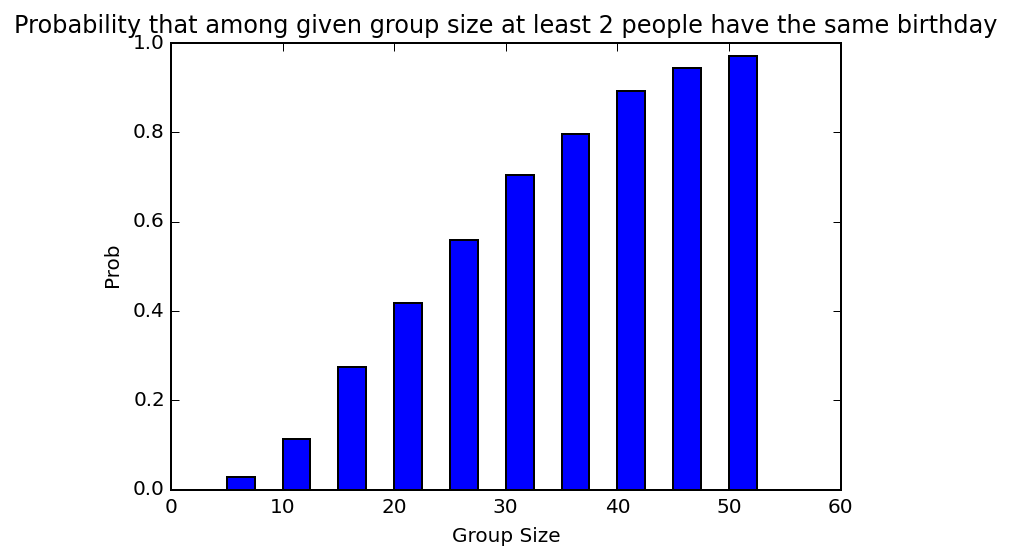

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

group_sizes = list(range(5, 55, 5))
probs = [prob_n_people_have_same_birthday(n, num_trials=1000) for n in group_sizes]
plt.xlabel("Group Size")
plt.ylabel("Prob")
plt.title("Probability that among given group size at least 2 people have the same birthday")

plt.bar(group_sizes, probs, width=2.5)

plt.show()

And now let's see a histogram of the number of people with the same birthday among 60 people out of 1000 trials

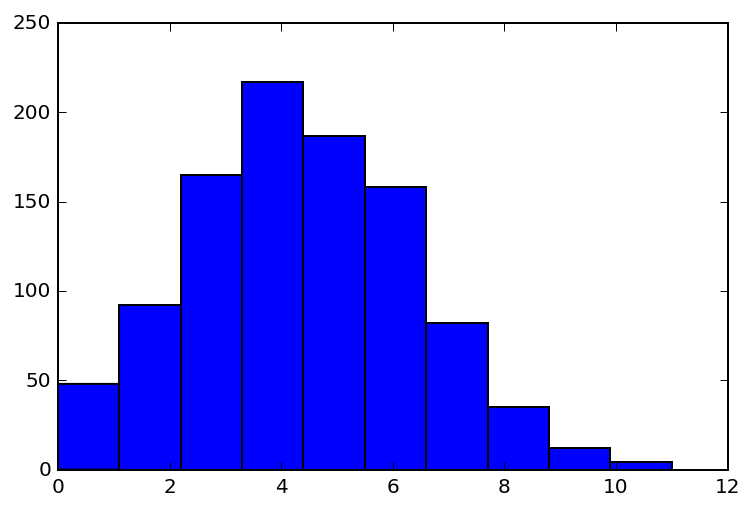

In [6]:
plt.hist([num_people_same_birthday(60) for i in range(1000)])
None

The histogram shows that the probability of there being zero people is unlikely, hence the overall probability of there being at least 1 is high.